# Retail supply chain management - Sales Forecasting-Machine learning Project 

                                                                                        project by-Vamsipriya Bayya

# Description

One of the leading retail stores in the US would like to predict the sales and demand accurately.
There are certain events and holidays which impact sales on each day. These are sales data available for 45 stores.
 The business is facing a supply chain challenge due to unforeseen demands and runs out of stock some times.



# Problem Statement

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.For that we need to forecast predictions for each store for the next 12 weeks.

# Data Description

### Dataset Information:
The sales.csv contains 6435 rows and 8 columns.

these are the following columns:

#### Store - Store number
This is the first column consist of store number.There are total 45 stores.

#### Date - Week of Sales
week wise dates are mentioned .143 weeks data is given precisely 2.9 years of data starting from 5/2/2010 to 26/10/2012.

#### Weekly_Sales - Sales for the given store in that week
per week sales per store is given. Here in this dataset 143 weeks of data per store is given.

#### Holiday_Flag - If it is a holiday week
Holiday flag depicts whether it a holiday or a non-Holiday(excluding weekends) it is denoted by  0-non Holiday and 1- Holiday

#### Temperature - Temperature on the day of the sale

#### Fuel_Price - Cost of the fuel in the region

#### CPI - Consumer Price Index
It is the instrument to measure inflation.When the CPI is rising it means that consumer prices are also rising, and when it falls it means consumer prices are generally falling. In short, a higher CPI indicates higher inflation.

#### Unemployment - Unemployment Rate
The unemployment rate is the percentage of people in the labour force who are unemployed.
A high unemployment rate means that the economy is not able to generate enough jobs for people seeking work.


# Objective

1.You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

  a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most
  b. If the weekly sales show a seasonal trend, when and what could be the reason?
  
  c. Does temperature affect the weekly sales in any manner?

  d. How is the Consumer Price index affecting the weekly sales of various stores?

   e. Top performing stores according to the historical data.

   f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

2.Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.


# Strategic plan of action:

We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:

Data preparation

Exploratory Data Analysis (EDA)

Data Pre-processing

Data Manipulation

Feature Selection/Extraction

Predictive Modelling

Project Outcomes & Conclusion

  ## Data Preparation

In [1]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
#Load the datset into DataFrame
data=pd.read_csv(r"C:/Users/lokes/OneDrive/Desktop/data analytics/capstone projects ML/Walmart/drive-download-20230709T122717Z-001-2/Walmart DataSet/Walmart DataSet.csv")

In [3]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
data.shape #returns the dimension of the dataset

(6435, 8)

Inference: This Dataset has 8 fields and 6435 records

In [5]:
data.head() #check first 5 rows of dataset to understand the data structure(Data Overview)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Exploratory Data Analysis EDA

In [6]:
data.info() #to Get the summary of Datatypes and non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
#Here date is a object datatype by default in python which we need to change to Datetime 
# going forward while doing Time series analysis

In [8]:
data.nunique().sort_values() ##Checking number of unique rows in each feature

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [9]:
data.describe() #returns the statistical summary of the overall dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
data.columns #to check the column names

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [11]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [12]:
data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

There are total 45 stores 

##### Re-indexing the column - with independent variables on one side and shifting Target column in the end

In [13]:
col=data.columns.tolist() #extract all the column names into a list #type castingcol
col#list(data.columns)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

#since Target column is weekly sales column shifting or reindexing column to the last


In [14]:
x=col.remove('Weekly_Sales')


In [15]:
col

['Store',
 'Date',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [16]:
col.append('Weekly_Sales')

In [17]:
col

['Store',
 'Date',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Weekly_Sales']

In [18]:
data=data[col] #moved the target column to the end 

In [19]:
data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106,1554806.68
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,0,64.88,3.997,192.013558,8.684,713173.95
6431,45,05-10-2012,0,64.89,3.985,192.170412,8.667,733455.07
6432,45,12-10-2012,0,54.47,4.000,192.327265,8.667,734464.36
6433,45,19-10-2012,0,56.47,3.969,192.330854,8.667,718125.53


In [20]:
col

['Store',
 'Date',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Weekly_Sales']

### Distribution of Data

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

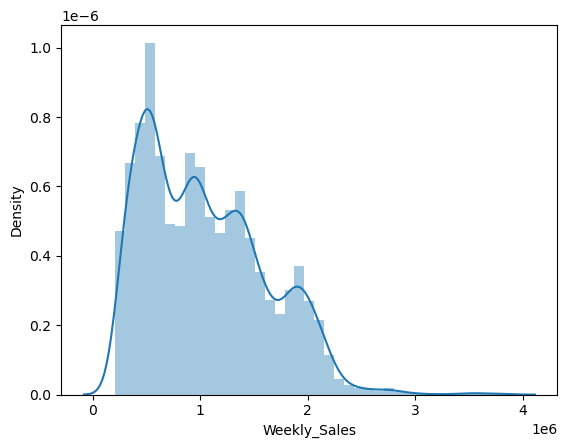

In [21]:
#Check the Distribution of Target Variable ie Weekly_Sales
sns.distplot(data["Weekly_Sales"])
#alternate method
# plt.figure(figsize=(5,3))
# #plt.hist(data["log_Weekly_Sales"])
# plt.hist(data["Weekly_Sales"])

#### Here we can see the Target Variable seems to be Normally Distributed but very slightly skewed to the left.

In [22]:
#alternative:weekly Sales data is slightly left skewed we can try log transformation
#data['log_Weekly_Sales']=np.log(data['Weekly_Sales'])

#or we can check again once outlier are removed the data becomes more normally distributed

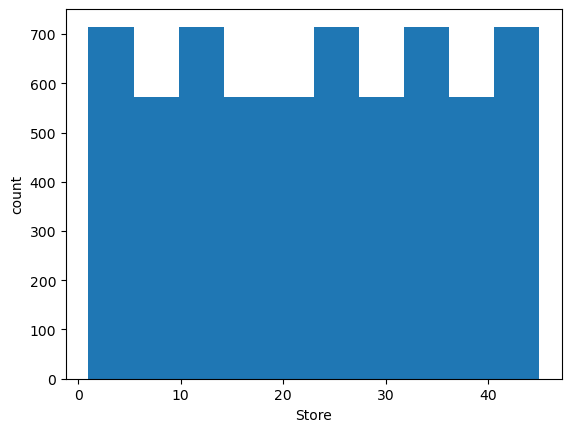

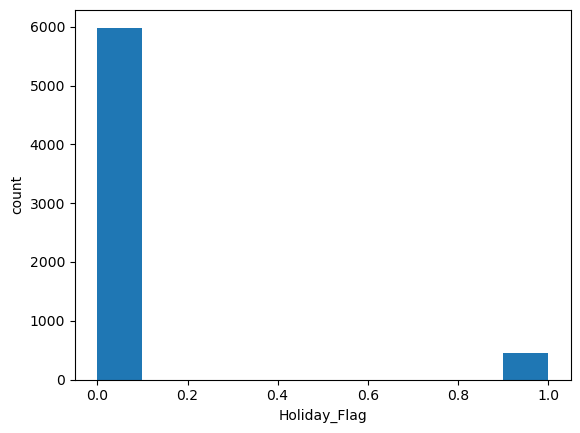

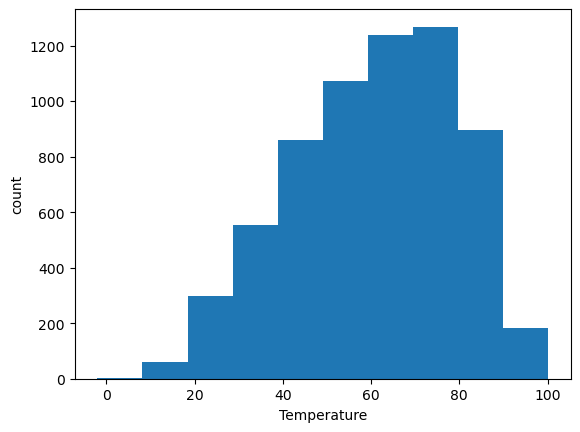

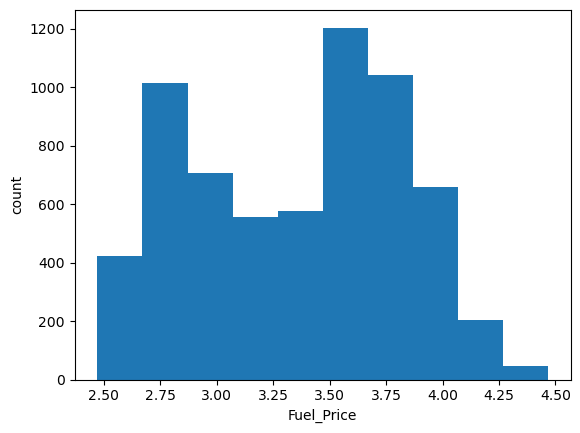

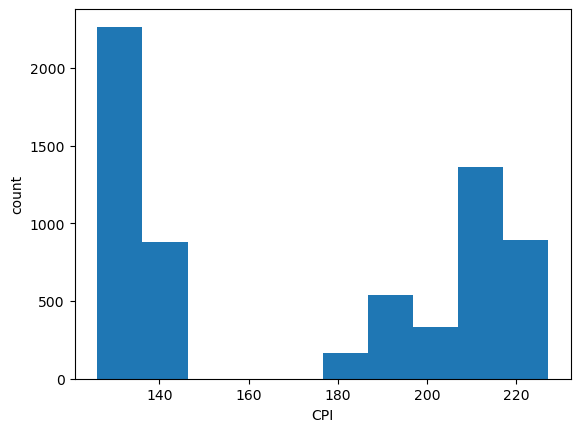

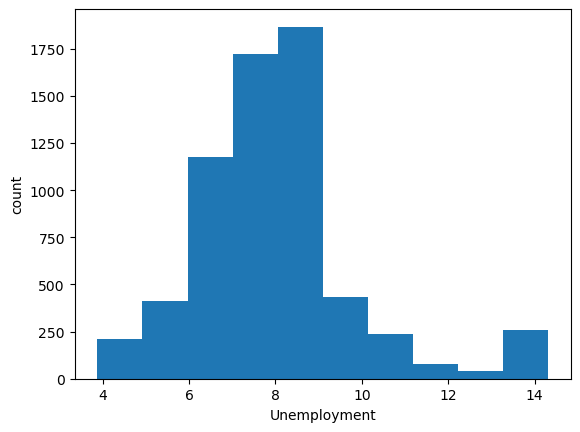

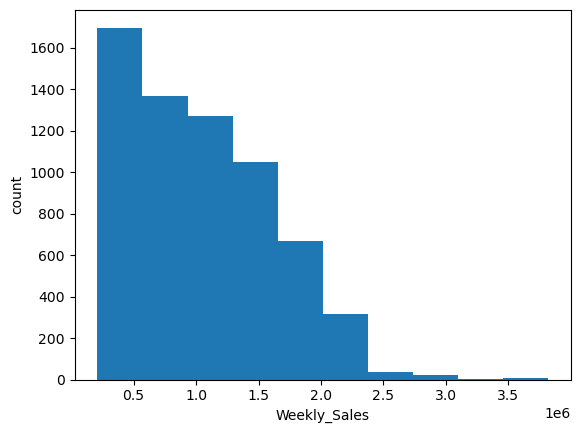

In [23]:
#Checking the data distribution for all the other variable by ploting Histogram
for col_name in col:
    if(data[col_name].dtypes=="int64" or data[col_name].dtypes=="float64"):
        plt.hist(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()   

#### we can see that Temperature and Unemployment columns data are Normally Distributed.

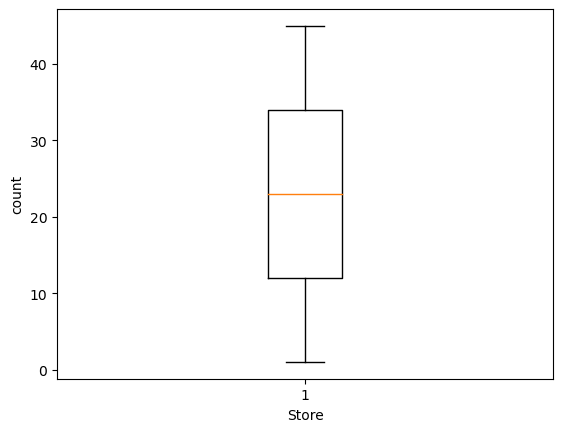

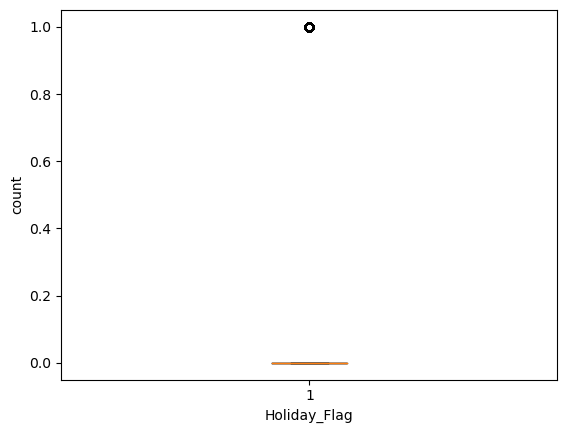

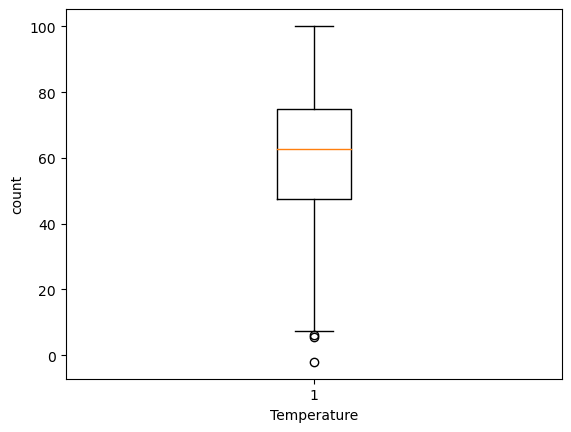

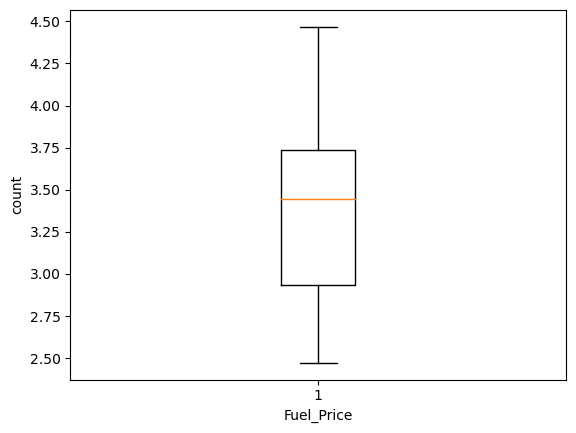

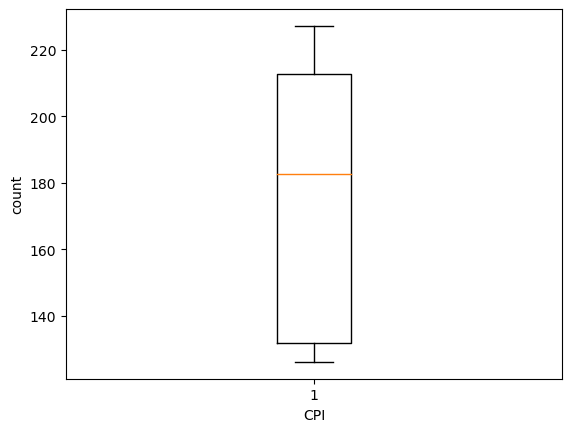

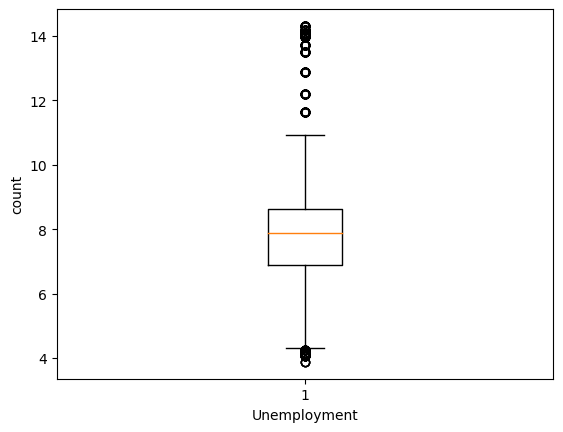

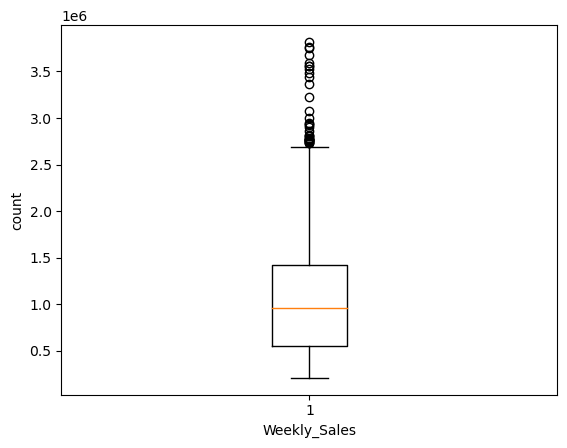

In [24]:
 #checking for outliers by ploting boxplot   
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

#### Outliers are there in Holiday flag,temperature and unemployment columns we need to treat them.
 
#### There are outliers in weekly sales column which is Target variable .

 Outliers in the target variable can be informative about the underlying sales process. 
For example, an outlier may represent a large sale on any specific particular day.
This information can be valuable for understanding the sales pipeline and forecasting future sales.

so as of now we will keep the outliers to solve few questions.

In [25]:
## To check the null values
data.isnull().sum()

Store           0
Date            0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekly_Sales    0
dtype: int64

#### There are no null values in the dataset

In [26]:
## To check for duplicate data
data.duplicated().sum()

0

#### There are no duplicate values

In [27]:
# to find the correlation between columns
data.corr()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
Store,1.000000e+00,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-0.335332
Holiday_Flag,-4.386841e-16,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,0.036891
Temperature,-2.265908e-02,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,-0.063810
Fuel_Price,6.002295e-02,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,0.009464
CPI,-2.094919e-01,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,-0.072634
Unemployment,2.235313e-01,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-0.106176
Weekly_Sales,-3.353320e-01,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,1.000000


<AxesSubplot:>

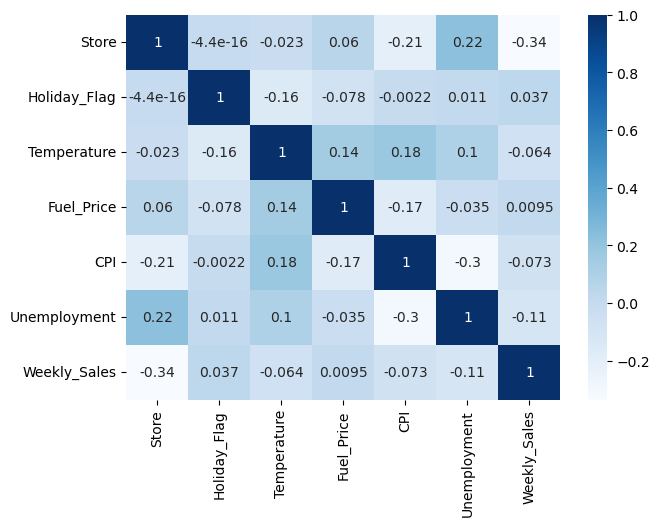

In [28]:
# Heatmap to find correaltion between variables 
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

In [29]:
## weekly sales is negatively corelated with stores and unemployment
## temperature is positively corelated to CPI and fuel price
## unemployment is positively corelated to stores


<AxesSubplot:ylabel='Holiday_Flag'>

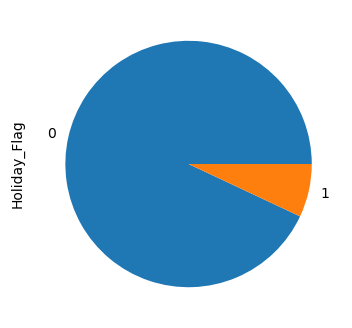

In [30]:
plt.figure(figsize=(4,4))
data.Holiday_Flag.value_counts().plot.pie()

In [31]:
#Question and Answers:

You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:

#### a.If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

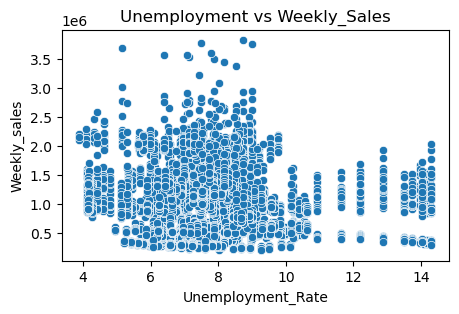

In [32]:
# In correlation matrix we can see that Weekly sales and Unemployment are some what negatively correlated 
# meaning if Unemployment rate is more,Weekly sales will be low.
#ploting scatter plot to see the spread
Weekly_sales=data['Weekly_Sales']
Unemp_rate=data['Unemployment']
plt.figure(figsize=(5,3))
sns.scatterplot(x=Unemp_rate,y=Weekly_sales)
plt.xlabel('Unemployment_Rate')
plt.ylabel('Weekly_sales')
plt.title('Unemployment vs Weekly_Sales')
plt.show()

 



#### Inference:Spending sharply dropped on the onset of unemployment; a higher unemployment index would generally result in a dip in sales as individuals tend to decrease overall spending.

<!-- we can infer from above Scatter plot that as unemployment Rate increases Weekly Sales drastically reduces.
Spending sharply drops on the onset of unemployment; a higher unemployment index
would generally result in a dip in sales as individuals tend to decrease overall spending.
 -->

In [33]:
avg_weekly_sales_storewise=data.groupby(['Store','Unemployment'])
#df_filtered=avg_weekly_sales_storewise[data['Unemployment']].sort_vales(ascending=False)
filtered_avg=avg_weekly_sales_storewise['Weekly_Sales'].sum()
a=filtered_avg.sort_values(ascending=True)
a.head()

Store  Unemployment
33     6.895           1065369.52
36     6.228           1137224.17
5      5.422           1301302.62
44     5.217           1360020.41
3      6.034           1684307.82
Name: Weekly_Sales, dtype: float64

#### The Worst performing Stores based on Unemployment rate are 33,36,5,44,3

In [34]:
#question b will be answered later during time series analysis

#### c.Does temperature affect the weekly sales in any manner?

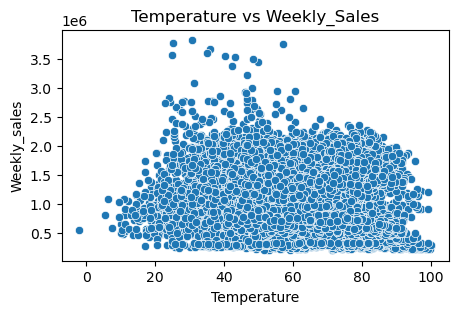

In [35]:
Weekly_sales=data['Weekly_Sales']
Unemp_rate=data['Temperature']
plt.figure(figsize=(5,3))
sns.scatterplot(x=Unemp_rate,y=Weekly_sales)
plt.xlabel('Temperature')
plt.ylabel('Weekly_sales')
plt.title('Temperature vs Weekly_Sales')
plt.show()

Inference: It has widely been known in the retail sector that weather has a profound effect on
sales.

While warmer weather promotes sales, cold/harsh or extremely hot weather is
generally not a great encouragement for shoppers to get outdoors and spend money.

Generally speaking, temperatures between 40 to 70 degrees Fahrenheit are considered
as favorable for humans to live in considering they are not as hot or cold.

##### As seen above in the scatter plot, the highest sales occur for most store  between the range of 40 to 80 degrees Fahrenheit, thus proving the idea that pleasant weather encourages higher sales. 
Sales are relatively lower for very low and very high or more temperatures but
seem to be adequately high for favorable climate conditions.

#### d.How is the Consumer Price index affecting the weekly sales of various stores?

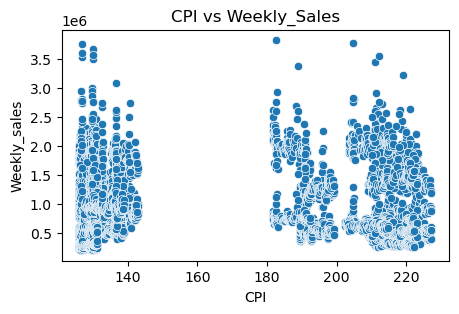

In [36]:
Weekly_sales=data['Weekly_Sales']
Unemp_rate=data['CPI']
plt.figure(figsize=(5,3))
sns.scatterplot(x=Unemp_rate,y=Weekly_sales)
plt.xlabel('CPI')
plt.ylabel('Weekly_sales')
plt.title('CPI vs Weekly_Sales')
plt.show()

CPI Consumer Price index is a great measure for the government when studying inflation.

A higher CPI generally means that the price of goods has increased and that an individual 
needs to spend more money to maintain the same standard of living.

In the above scatter plot , we can identify three different clusters around differentranges of CPI
while there seems to be no visible relationship between the change inCPI and weekly sales for Walmart stores

In [37]:
avg_weekly_sales_storewise=data.groupby(['Store','CPI'])
#df_filtered=avg_weekly_sales_storewise[data['Unemployment']].sort_vales(ascending=False)
filtered_avg=avg_weekly_sales_storewise['Weekly_Sales'].sum()
a=filtered_avg.sort_values(ascending=True)
a.head()

Store  CPI       
33     126.731333    209986.25
       126.436419    213538.32
       130.071032    215359.21
       127.087677    219804.85
       129.845967    220060.35
Name: Weekly_Sales, dtype: float64

In [38]:
#store 33 has the less sales based on CPI value

e.Top performing stores according to the historical data.

In [39]:
#average weekly salary storewise 
avg_weekly_sales_storewise=data.groupby('Store')['Weekly_Sales'].mean()
filtered_avg=avg_weekly_sales_storewise.sort_values(ascending=False)
filtered_avg

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
19    1.444999e+06
31    1.395901e+06
23    1.389864e+06
24    1.356755e+06
11    1.356383e+06
28    1.323522e+06
41    1.268125e+06
32    1.166568e+06
18    1.084718e+06
22    1.028501e+06
12    1.009002e+06
26    1.002912e+06
34    9.667816e+05
40    9.641280e+05
35    9.197250e+05
8     9.087495e+05
17    8.935814e+05
45    7.859814e+05
21    7.560691e+05
25    7.067215e+05
43    6.333247e+05
15    6.233125e+05
7     5.706173e+05
42    5.564039e+05
9     5.439806e+05
29    5.394514e+05
16    5.192477e+05
37    5.189003e+05
30    4.385796e+05
3     4.027044e+05
38    3.857317e+05
36    3.735120e+05
5     3.180118e+05
44    3.027489e+05
33    2.598617e+05
Name: Weekly_Sales, dtype: float64

In [40]:
filtered_avg.head()

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64

In [41]:
#Top 5 performing stores are 20,4,14,13,2 according to historical data

f.The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

In [42]:
filtered_avg.tail()

Store
38    385731.653287
36    373511.992797
5     318011.810490
44    302748.866014
33    259861.692028
Name: Weekly_Sales, dtype: float64

In [43]:
#worst performing stores with respect to Sales are 33,44,5,36,38
#out of which the worst Performing Store is store 33 with significant difference between highest and lowest store is 
difference = filtered_avg.max() - filtered_avg.min()
print(" difference between the highest and lowest performing stores",difference)

 difference between the highest and lowest performing stores 1847815.1783216782


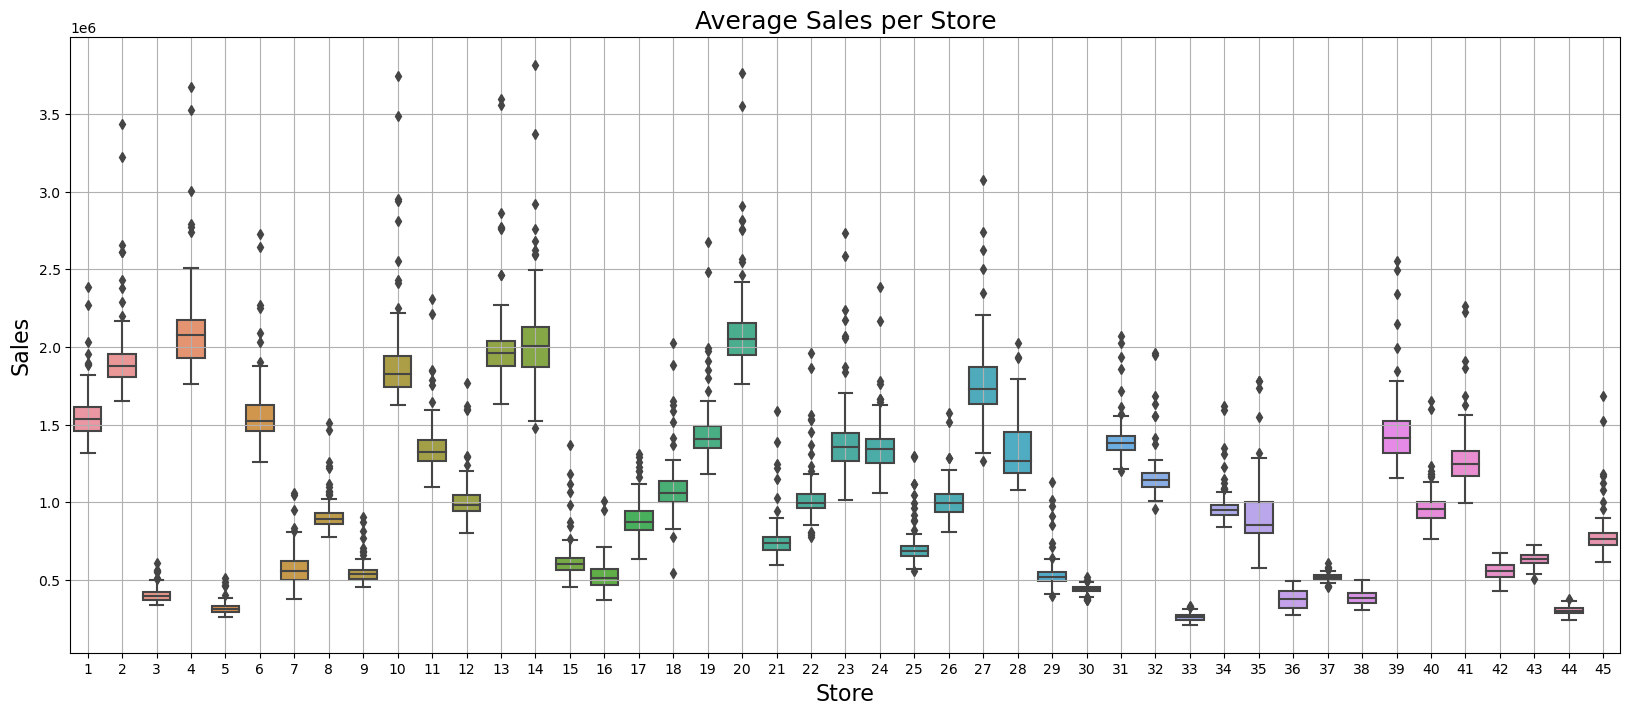

In [44]:
#Another way to find store performance is plotting boxplot:
#store wise sales
plt.figure(figsize=(20,8))
sns.boxplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
#plt.savefig('plots/avg_sales_store.png')
plt.show()

In [45]:
#Here we can roughly infer that store 20 is having highest sales and store 33 is worst performing store

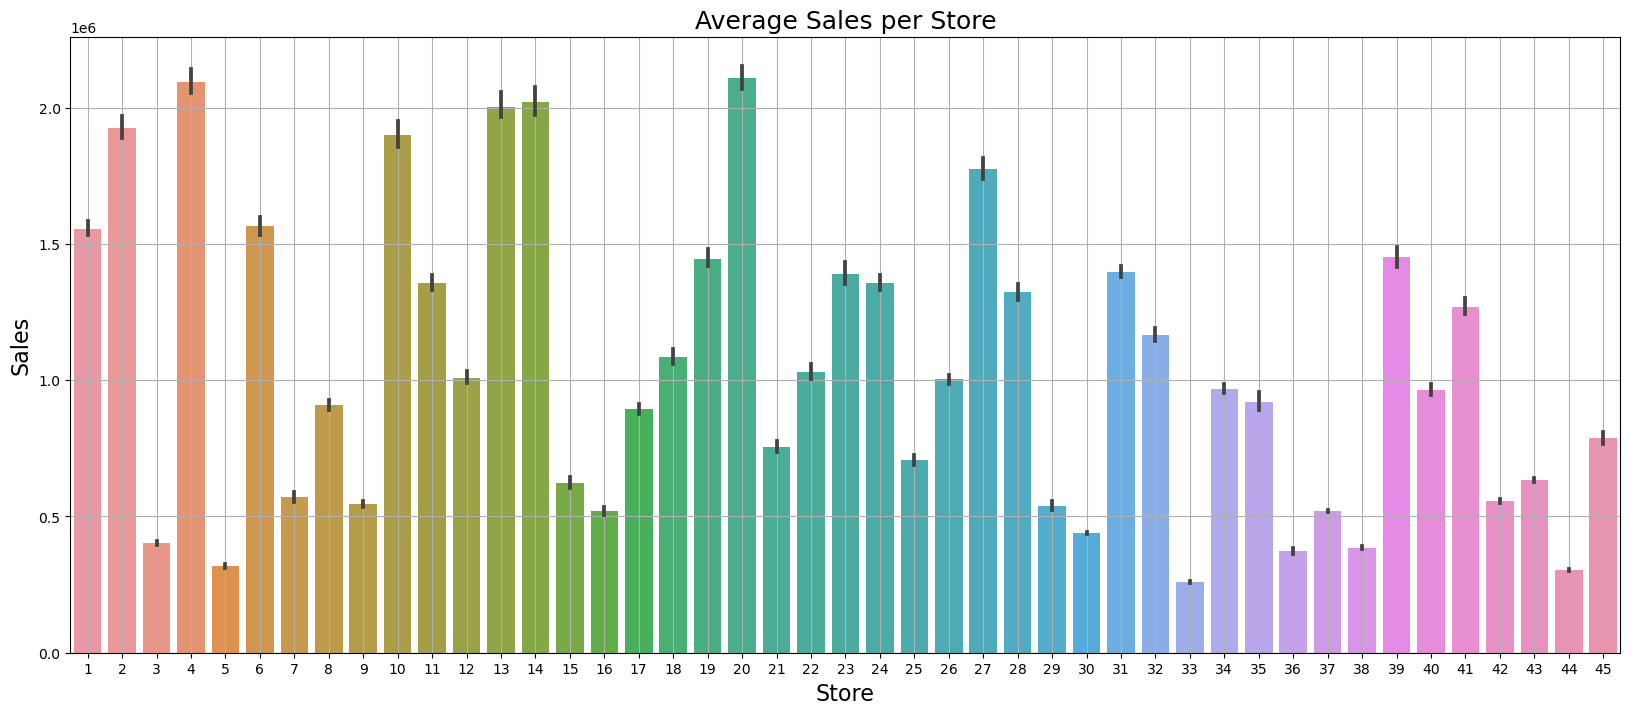

In [46]:
#simple bar graph also displays store wise sales
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
#plt.savefig('plots/avg_sales_store.png')
plt.show()

# Data pre-processing

### Steps and inspiration

In [47]:
#removing the outliers using IQR method 

In [48]:
Q1=data.Holiday_Flag.quantile(0.25)
Q3=data.Holiday_Flag.quantile(0.75)
IQR=Q3-Q1
data = data [(data.Holiday_Flag >= Q1-1.5*IQR) & (data.Holiday_Flag <= Q3+1.5*IQR)]

Q1=data.Temperature.quantile(0.25)
Q3=data.Temperature.quantile(0.75)
IQR=Q3-Q1
data = data [(data.Temperature >= Q1-1.5*IQR) & (data.Temperature <= Q3+1.5*IQR)]

Q1=data.Unemployment.quantile(0.25)
Q3=data.Unemployment.quantile(0.75)
IQR=Q3-Q1
data = data[(data.Unemployment >= Q1-1.5*IQR) & (data.Unemployment <= Q3+1.5*IQR)]

Q1=data.Weekly_Sales.quantile(0.25)  #use ctrl+/ for multiple hashtag
Q3=data.Weekly_Sales.quantile(0.75)
IQR=Q3-Q1
data = data[(data.Weekly_Sales >= Q1-1.5*IQR) & (data.Weekly_Sales <= Q3+1.5*IQR)]

In [49]:
data.shape

(5496, 8)

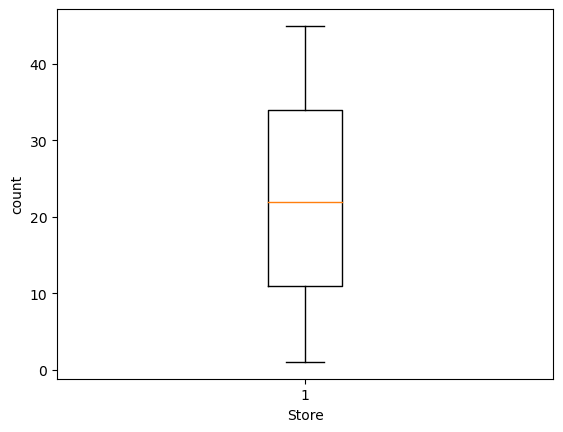

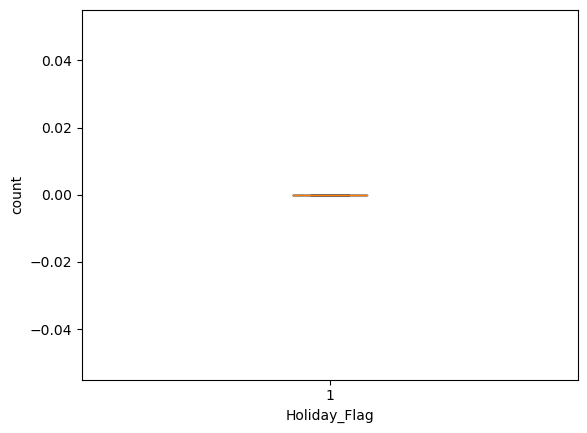

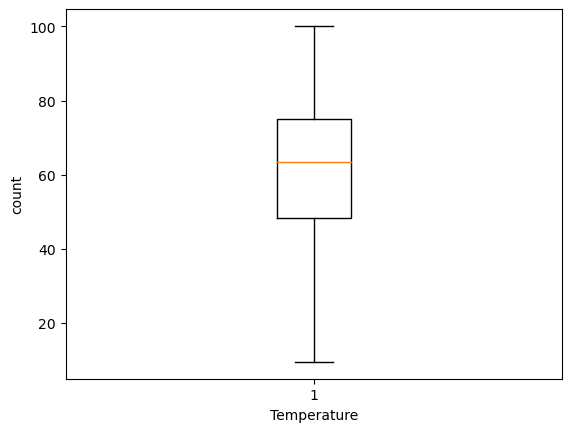

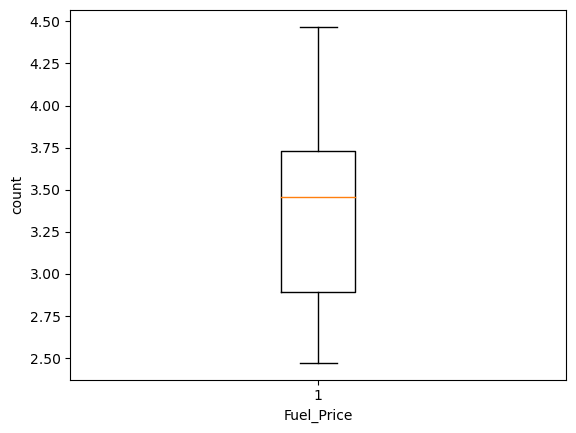

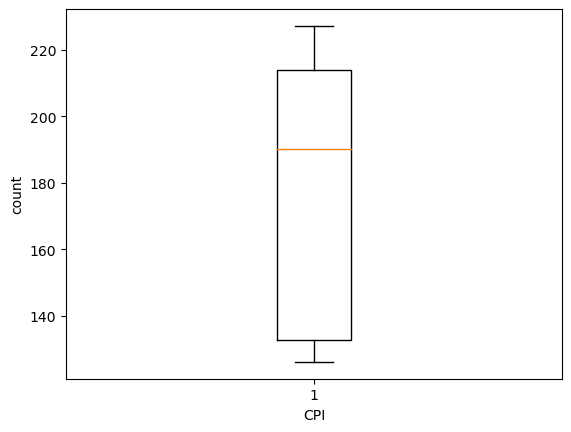

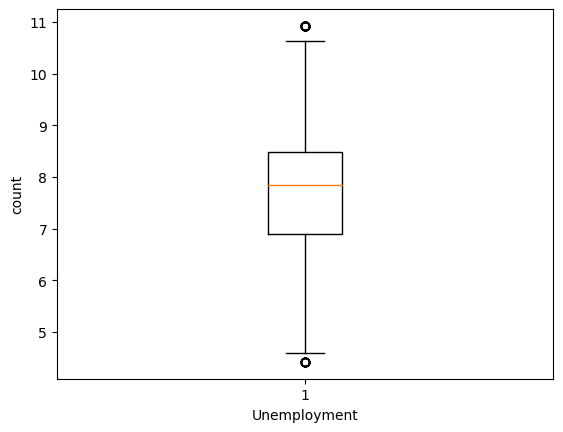

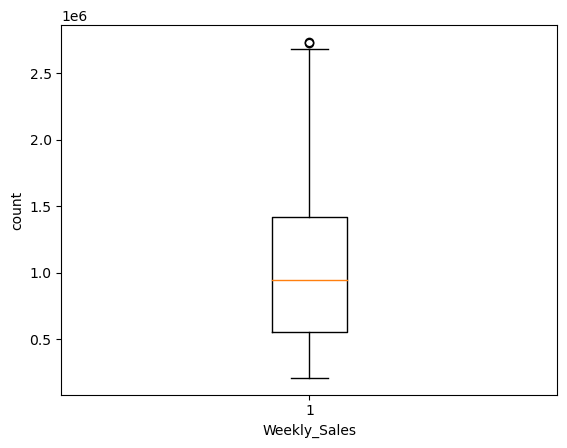

In [50]:
 #checking whether Outliers are removed  
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [51]:
data.corr()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
Store,1.000000,NaN,-0.025612,0.049312,-0.211939,0.304901,-0.316015
Holiday_Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.025612,NaN,1.000000,0.122791,0.224546,0.032338,-0.044799
Fuel_Price,0.049312,NaN,0.122791,1.000000,-0.141224,-0.102163,0.015971
CPI,-0.211939,NaN,0.224546,-0.141224,1.000000,-0.229936,-0.078983
Unemployment,0.304901,NaN,0.032338,-0.102163,-0.229936,1.000000,-0.062287
Weekly_Sales,-0.316015,NaN,-0.044799,0.015971,-0.078983,-0.062287,1.000000


In [52]:
#there is negative corelation between weekly sales and stores,stores and CPI
#and positive corelation between store and umemployment

# statistic analysis 

p value -used in hypotesis testing which will help to decide to accept or reject the null value

significance value -p value need to be compared with some standard value ie alpha value= 0.5 or 5% .

                    if p value is less than alpha or sample is good to go
                    
confidence interval-confident area that if a probability will lie in the area then

                    i am very much confident about that claim mostly 95%
                    
hypothesis testing-inferential stats-z tezt,F test,Ttest,Anova

## let us see with shapiro wilk test
we will assume null and alternate hypothesis

null hypo h0 ---> data is normally distributed

Alt hypo h1 ---> data is not normally distributed

In [53]:
from scipy.stats import shapiro
t_stat,p_value =shapiro(data["Unemployment"])

In [54]:
print(t_stat,'',p_value)

0.9935948252677917  5.322237503415251e-15


In [55]:
from scipy.stats import shapiro
t_stat,p_value =shapiro(data["CPI"])

In [56]:
print(t_stat,'',p_value)

0.7956778407096863  0.0


In [57]:
from scipy.stats import shapiro
t_stat,p_value =shapiro(data["Weekly_Sales"])

In [58]:
print(t_stat,'',p_value)

0.9467129111289978  1.0623804177432168e-40


In [59]:
#Target is normally distributed now

# Choosing the Algorithms :

1.Linear Regression

2.Random Forest Regressor

3.Time series Forecasting

The main purpose of creating such models is to predict the weekly Sales for different Walmart stores

As the output Variable ie Target which is Weekly_Sales and it contains continuous data therefore selected the above Algorithms



### Motivation and reasons for choosing the Algorithm

1.Why Choose Linear Regression:

first and foremost reason is target is continuous data therefore linear regression algorithm works well.
Starting with the most basic and straightforward model for this analysis, 
linear regression aims at finding relationships between two linear variables
Predicted value and original Target value.

The ‘scikit-learn’ library along with the ‘Linear Regression’ function in Python has
been used to create the linear regression model. The training dataset has been further
divided into the training and validation datasets; the validation dataset is primarily
created to test models based on different parameters to see what parameters result in
higher accuracy.

2.Why Choose Random Forest Regression:
    
Random forests are typically very accurate regression models, especially for complex datasets.

They are often used in regression tasks where the data is noisy or where there are outliers.
    
Random forests are less susceptible to overfitting than other regression models, such as linear regression and decision trees.

# 1. Model Building-Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
col

['Store',
 'Date',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Weekly_Sales']

## Technique used:Feature selection process 
 Removing multicollinearity can  reduce features which will eventually result in a less complex model 
    and also the overhead to store these features will be less.This will increase the accuracy level in Linear regression

In [63]:
## Multi colinearity 5 or 6
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
    if((data[col].dtype != 'object') & (col !='Weekly_Sales')): #& (col !='log_Weekly_Sales') ):
        col_list.append(col)

In [64]:
col_list

['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [65]:
x=data[col_list]

In [66]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106
5,1,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684
6431,45,0,64.89,3.985,192.170412,8.667
6432,45,0,54.47,4.000,192.327265,8.667
6433,45,0,56.47,3.969,192.330854,8.667


In [67]:
x.values

array([[  1.       ,   0.       ,  42.31     ,   2.572    , 211.0963582,
          8.106    ],
       [  1.       ,   0.       ,  39.93     ,   2.514    , 211.2891429,
          8.106    ],
       [  1.       ,   0.       ,  46.63     ,   2.561    , 211.3196429,
          8.106    ],
       ...,
       [ 45.       ,   0.       ,  54.47     ,   4.       , 192.3272654,
          8.667    ],
       [ 45.       ,   0.       ,  56.47     ,   3.969    , 192.3308542,
          8.667    ],
       [ 45.       ,   0.       ,  58.85     ,   3.882    , 192.3088989,
          8.667    ]])

In [68]:
for i in range(len(x.columns)):
    print(i)  #just check for len of columns

0
1
2
3
4
5


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

        feature        VIF
0         Store   4.587212
1  Holiday_Flag        NaN
2   Temperature  13.774001
3    Fuel_Price  29.348701
4           CPI  17.076694
5  Unemployment  27.449737


In [70]:
data=data.drop(['Fuel_Price'],axis=1) #droping the highest VIF value column note that it should be dropped one by one

In [71]:
col_list=[]
for col in data.columns:
    if((data[col].dtype != 'object') & (col !='Weekly_Sales')):#& (col !='log_Weekly_Sales')):
        col_list.append(col)
        
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

        feature        VIF
0         Store   4.537606
1  Holiday_Flag        NaN
2   Temperature  12.819381
3           CPI  15.047655
4  Unemployment  19.593293


In [72]:
data=data.drop(['Holiday_Flag'],axis=1)

In [73]:
col_list=[]
for col in data.columns:
    if((data[col].dtype != 'object') & (col !='Weekly_Sales')):#& (col !='log_Weekly_Sales')):
        col_list.append(col)
        
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

        feature        VIF
0         Store   4.537606
1   Temperature  12.819381
2           CPI  15.047655
3  Unemployment  19.593293


In [74]:
data=data.drop(['Unemployment'],axis=1)

In [75]:
col_list=[]
for col in data.columns:
    if((data[col].dtype != 'object') & (col !='Weekly_Sales')):#& (col !='log_Weekly_Sales')):
        col_list.append(col)
        
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

       feature        VIF
0        Store   3.342748
1  Temperature  11.052110
2          CPI  10.773604


In [76]:
data=data.drop(['Temperature'],axis=1)

In [77]:
col_list=[]
for col in data.columns:
    if((data[col].dtype != 'object') & (col !='Weekly_Sales')):#& (col !='log_Weekly_Sales')):
        col_list.append(col)
        
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

  feature       VIF
0   Store  3.116588
1     CPI  3.116588


after feature selection process Store and CPI are the most relevant columns the value of VIF should be <5 till then we have to continue dropping the columns

In [78]:
data

,Store,Date,CPI,Weekly_Sales
0,1,05-02-2010,211.096358,1643690.90
2,1,19-02-2010,211.289143,1611968.17
3,1,26-02-2010,211.319643,1409727.59
4,1,05-03-2010,211.350143,1554806.68
5,1,12-03-2010,211.380643,1439541.59
...,...,...,...,...
6430,45,28-09-2012,192.013558,713173.95
6431,45,05-10-2012,192.170412,733455.07
6432,45,12-10-2012,192.327265,734464.36
6433,45,19-10-2012,192.330854,718125.53


In [79]:
data

,Store,Date,CPI,Weekly_Sales
0,1,05-02-2010,211.096358,1643690.90
2,1,19-02-2010,211.289143,1611968.17
3,1,26-02-2010,211.319643,1409727.59
4,1,05-03-2010,211.350143,1554806.68
5,1,12-03-2010,211.380643,1439541.59
...,...,...,...,...
6430,45,28-09-2012,192.013558,713173.95
6431,45,05-10-2012,192.170412,733455.07
6432,45,12-10-2012,192.327265,734464.36
6433,45,19-10-2012,192.330854,718125.53


In [80]:
x=data.loc[:,['Store','CPI']]
y=data['Weekly_Sales']

In [81]:
x

,Store,CPI
0,1,211.096358
2,1,211.289143
3,1,211.319643
4,1,211.350143
5,1,211.380643
...,...,...
6430,45,192.013558
6431,45,192.170412
6432,45,192.327265
6433,45,192.330854


In [82]:
y

0       1643690.90
2       1611968.17
3       1409727.59
4       1554806.68
5       1439541.59
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 5496, dtype: float64

In [83]:
#lets start with training the model since we dicvided the data into train x and train y

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0) #random=0 is keeping the same sample everytime

In [85]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4396, 2)
(4396,)
(1100, 2)
(1100,)


In [86]:
x_train,x_test,y_train,y_test

(      Store         CPI
 6403     45  190.536321
 1735     13  126.114000
 583       5  210.989120
 1854     13  131.043000
 5454     39  210.097523
 ...     ...         ...
 5829     41  196.963160
 3737     27  136.324339
 1952     14  188.198365
 2986     21  221.521506
 3121     22  142.075926
 
 [4396 rows x 2 columns],
       Store         CPI
 1317     10  126.101935
 3679     26  137.063258
 2309     17  126.139200
 1767     13  127.580032
 1923     14  185.802953
 ...     ...         ...
 4484     32  191.667891
 2635     19  134.177774
 5290     37  222.113657
 5764     41  190.974107
 3453     25  204.465056
 
 [1100 rows x 2 columns],
 6403     791835.37
 1735    2003435.31
 583      288839.73
 1854    1927664.11
 5454    1280414.80
            ...    
 5829    1243814.77
 3737    1887182.27
 1952    1969360.72
 2986     693013.59
 3121     997868.63
 Name: Weekly_Sales, Length: 4396, dtype: float64,
 1317    1766331.45
 3679     939158.25
 2309     958875.37
 1767    1633

In [87]:
l_model=LinearRegression() #building the model

In [88]:
l_model.fit(x_train,y_train) #fit the model to train

LinearRegression()

In [89]:
predictions=l_model.predict(x_test) #now predict the test values

In [90]:
predictions

array([1331602.072537  , 1071315.17352345, 1228136.17157069, ...,
        722791.86871416,  731838.1151976 ,  938631.53240422])

In [91]:
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})

In [92]:
error_pred

,Prediction_data,Actual_data


In [93]:
error_pred['Actual_data']=y_test 

In [94]:
error_pred

,Prediction_data,Actual_data
1317,NaN,1766331.45
3679,NaN,939158.25
2309,NaN,958875.37
1767,NaN,1633663.12
1923,NaN,1930617.64
...,...,...
4484,NaN,1006814.85
2635,NaN,1419911.91
5290,NaN,534738.43
5764,NaN,1434908.13


In [95]:
error_pred['Prediction_data']=predictions

In [96]:
error_pred

,Prediction_data,Actual_data
1317,1.331602e+06,1766331.45
3679,1.071315e+06,939158.25
2309,1.228136e+06,958875.37
1767,1.284061e+06,1633663.12
1923,1.141919e+06,1930617.64
...,...,...
4484,8.632431e+05,1006814.85
2635,1.181012e+06,1419911.91
5290,7.227919e+05,534738.43
5764,7.318381e+05,1434908.13


In [97]:
error_pred.shape

(1100, 2)

In [98]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [99]:
error_pred.head()

,Prediction_data,Actual_data,Error
1317,1.331602e+06,1766331.45,434729.377463
3679,1.071315e+06,939158.25,-132156.923523
2309,1.228136e+06,958875.37,-269260.801571
1767,1.284061e+06,1633663.12,349602.225143
1923,1.141919e+06,1930617.64,788698.432407


In [100]:
from sklearn.metrics import *

In [101]:
train_predict=l_model.predict(x_train)
train_predict

array([ 673719.05752483, 1287268.08858739, 1219742.97610582, ...,
       1136678.83675424,  960394.44848711, 1119425.90159044])

In [102]:
r2_on_test=r2_score(y_test,predictions) #R-Squared value ie coefficient of determination ,is a statistical measure to check of how well a linear regression model fits the data.
r2_on_test

0.11149422794516106

### Inference:

In other words, R-squared measures how good of a job the regression model does of predicting the dependent variable 
based on the independent variable


### In the above model r2 accuracy score= 11% 

The model explains 11% of the variance in the dependent variable. This is a poor fit of the data points around its mean. Hence,as a result of low statistical significance, this model might not be the best method toestablish proof of the existence of such relationships.
so we need to work on other models to see which model will provide better accuracy let do Random Forest analysis.

# 2.Random Forest


Random Forest Regression is a supervised learning algorithm that uses an ensemble of decision trees to make predictions.
It works on the Bagging Technique.In bagging, a group of models is trained on different subsets of the dataset, and the final output is generated by collating the outputs of all the different models. 

Random Forest Regression works by building a large number of decision trees on different subsets of the training data. 
Each decision tree is trained to predict the dependent variable based on the independent variables.

The predictions of all of the decision trees are then averaged together to produce the final prediction.

Random Forest Regression is more accurate than individual decision trees because it is less likely to overfit the training data.
Overfitting occurs when the model learns the training data too well and is unable to generalize to new data.

## Model Building

In [27]:
#first split the data into train and test data
x=data[col_list]

In [28]:
y=data['Weekly_Sales']

In [29]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106
5,1,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684
6431,45,0,64.89,3.985,192.170412,8.667
6432,45,0,54.47,4.000,192.327265,8.667
6433,45,0,56.47,3.969,192.330854,8.667


In [30]:
y

0       1643690.90
2       1611968.17
3       1409727.59
4       1554806.68
5       1439541.59
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 5496, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
# x_train = np.array(x_train).reshape(-1, 1)
# x_test = np.array(x_test).reshape(-1, 1)
# y_train = np.array(y_train).reshape(-1, 1)
# y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state = 42)


In [35]:
rf1=rf.fit(x_train,y_train) 

In [36]:
y_pred=rf1.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error
mae=mean_squared_error(y_test,y_pred)
print("Mean squared Error (MAE):", mae)

Mean squared Error (MAE): 11883550666.466513


In [38]:
y_pred_train = rf1.predict(x_train)
mae = mean_squared_error(y_pred_train,y_train)

In [39]:
mae

1678137698.2474725

In [40]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_pred_train, y_train)

In [41]:
r_squared

0.9942684848577421

as accuracy on training data is higher model created is overfitting

# Hyper Parameter Tuning

Hyper-parameters are parameters that define the model structure, and tuning hyper-parameters is the process of finding the best model structure. So that model structure makes the model more efficient

There are many parameters which we can look into while building the randomforest model they are:

bootstrap'/max_sample: The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree

'max_depth': The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node

'max_features': This resembles the number of maximum features provided to each tree in a random forest.

'min_samples_leaf': This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node.

'min_samples_split': parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it.

'n_estimators': number of decision trees to choose while fitting the random forest model

There are two techniques for hyper parameter tuning : 1.RandomizedSearchCV 2.GridSearchCV

For our model we will be implementing RandomizedSearchCV method and tune our model

So we'll select the best values for each parameter ,below code help's us to extract the best values for each parameter

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Steps to implement:

1.Use the random grid to search for best hyperparameters

2.First create the base model to tune 3.Random search of parameters, using 

3 fold cross validation 

4.search across 100 different combinations, and use all available cores 

5.Fit the random search model

In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf2=rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [44]:
rf2.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [45]:
y_pred=rf2.predict(x_test)

In [47]:


# Calculate the R-squared score
r_squared = np.corrcoef(y_test, y_pred)[0, 1]**2

# Print the R-squared score
print('R-squared score:', r_squared)

R-squared score: 0.9605293172231144


In [ ]:
now model fits better 96% data is predicting correctly.

# Model Evaluation

### Feature Importance

In [48]:
importance = rf1.feature_importances_

In [49]:
importance= pd.Series(importance)
importance

0    0.731749
1    0.000000
2    0.019518
3    0.015080
4    0.169915
5    0.063737
dtype: float64

In [81]:
df=pd.DataFrame(columns=['Feature','Importance'])

In [51]:
col_list.remove('Holiday_Flag') #removing unimportant column

In [83]:
col_list

['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [53]:
df['Feature']=col_list

In [54]:
df

,Feature,Importance
0,Store,NaN
1,Temperature,NaN
2,Fuel_Price,NaN
3,CPI,NaN
4,Unemployment,NaN


In [55]:
df['Importance']=importance

In [56]:
df

,Feature,Importance
0,Store,0.731749
1,Temperature,0.000000
2,Fuel_Price,0.019518
3,CPI,0.015080
4,Unemployment,0.169915


<AxesSubplot:xlabel='Feature', ylabel='Importance'>

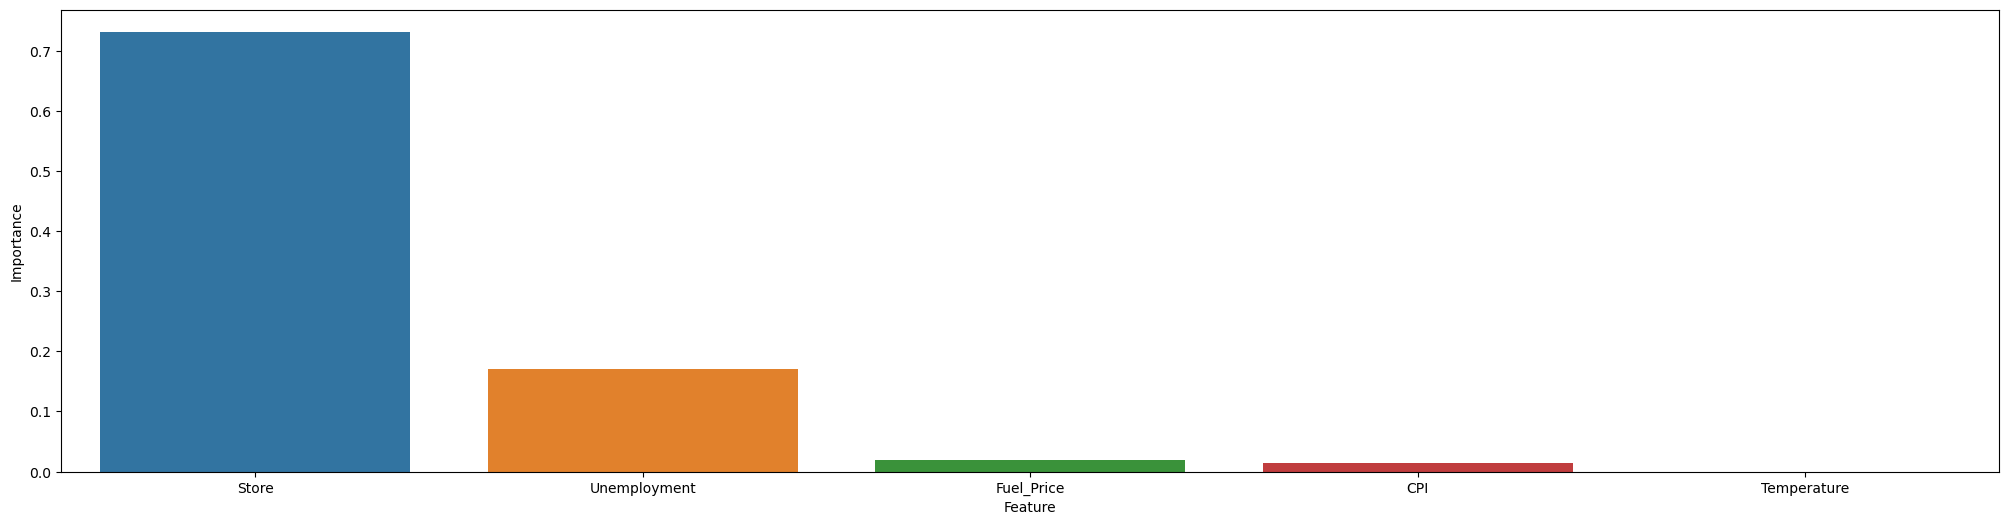

In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
# make barplot and sort bars
sns.barplot(x='Feature',y="Importance",data=df, order=df.sort_values('Importance', ascending=False).Feature)

#### Inference:

The above plot shows that the most important features for predicting weekly sales at  stores are store type and unemployment rate. 
This suggests that the model is primarily using these two features to make predictions.

The store feature is important because different types of stores have different sales patterns.

The unemployment rate feature is important because it is a proxy for economic conditions.
When the unemployment rate is high, people are less likely to spend money, which can lead to lower sales at Walmart stores.

These findings can be used by Walmart to develop strategies to improve sales. For example, could focus on increasing
sales at Neighborhood Markets by offering more competitive prices and promotions.

company could also focus on increasing sales during economic downturns by offering discounts on essential items.

In addition to the two most important features, the feature importance report also shows that other factors, such as temperature, fuel price, and CPI, are also important for predicting weekly sales at Walmart stores. However, these factors are less important than store type and unemployment rate.
